# My musical journey

## Introduction

This notebook serves to give you some trends and analysis on your spotify streaming data.



## Data Import and Cleaning

Import the necessary libraries

In [1]:
#Data Manipulation
import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
# Basic libraries
import os
import json
# Spotify API
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
# Other
import pycountry
from urllib.request import urlopen
from datetime import datetime
# Clustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler



Now we need to import the json files and build a single dataframe. Let's define an aux function to do that.

Be sure to place on the folder only the audio streaming json files.

In [2]:
def process_spotify_data(folder_path):
  """Processes all JSON files in the specified folder and concatenates them into a single DataFrame."""

  history_list = []
  for file in os.listdir(folder_path):
    if file.endswith(".json"):
      file_path = os.path.join(folder_path, file)
      history_list.append(pd.read_json(file_path))

  history = pd.concat(history_list, ignore_index=True)
  return history

In [3]:
folder_path = "./data"
history = process_spotify_data(folder_path)
history.head() #Removed the output for privacy reasons

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2010-06-23T16:22:03Z,zmoe,Windows Vista (Home Premium Ed) SP1 [x86 0],7970,ES,82.158.68.195,None,When The Sun Goes Down,Arctic Monkeys,When The Sun Goes Down,...,NaN,NaN,NaN,clickrow,clickrow,False,True,NaN,NaN,NaN
1,2010-06-23T16:22:24Z,zmoe,Windows Vista (Home Premium Ed) SP1 [x86 0],22704,ES,82.158.68.195,None,Fluorescent Adolescent,Arctic Monkeys,Fluorescent Adolescent,...,NaN,NaN,NaN,clickrow,clickrow,False,True,NaN,NaN,NaN
2,2010-06-23T16:25:46Z,zmoe,Windows Vista (Home Premium Ed) SP1 [x86 0],200738,ES,82.158.68.195,None,Fake Tales Of San Francisco,Arctic Monkeys,"Whatever People Say I Am, That's What I'm Not",...,NaN,NaN,NaN,clickrow,clickrow,False,True,NaN,NaN,NaN
3,2010-06-23T16:25:49Z,zmoe,Windows Vista (Home Premium Ed) SP1 [x86 0],2650,ES,82.158.68.195,None,Dancing Shoes,Arctic Monkeys,"Whatever People Say I Am, That's What I'm Not",...,NaN,NaN,NaN,clickrow,clickrow,False,True,NaN,NaN,NaN
4,2010-06-23T16:26:03Z,zmoe,Windows Vista (Home Premium Ed) SP1 [x86 0],13310,ES,82.158.68.195,None,You Probably Couldn't See For The Lights But Y...,Arctic Monkeys,"Whatever People Say I Am, That's What I'm Not",...,NaN,NaN,NaN,clickrow,clickrow,False,True,NaN,NaN,NaN


In [4]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89453 entries, 0 to 89452
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ts                                 89453 non-null  object 
 1   username                           89453 non-null  object 
 2   platform                           89453 non-null  object 
 3   ms_played                          89453 non-null  int64  
 4   conn_country                       89453 non-null  object 
 5   ip_addr_decrypted                  83913 non-null  object 
 6   user_agent_decrypted               72175 non-null  object 
 7   master_metadata_track_name         86336 non-null  object 
 8   master_metadata_album_artist_name  86336 non-null  object 
 9   master_metadata_album_album_name   86336 non-null  object 
 10  spotify_track_uri                  86336 non-null  object 
 11  episode_name                       115 non-null    obj

The dataframe dictionary is this:

#### Technical Fields in Spotify Streaming History Data


| Technical Field | Contains |
|---|---|
| ts | This field is a timestamp indicating when the track stopped playing in UTC (Coordinated Universal Time). The order is year, month and day followed by a timestamp in military time. |
| username | This field is your Spotify username. |
| platform | This field is the platform used when streaming the track (e.g. Android OS, Google Chromecast). |
| ms_played | This field is the number of milliseconds the stream was played. |
| conn_country | This field is the country code of the country where the stream was played (e.g. SE - Sweden). |
| Ip_addr_decrypted | This field contains the IP address logged when streaming the track. |
| user_agent_decrypted | This field contains the user agent used when streaming the track (e.g. a browser, like Mozilla Firefox, or Safari). |
| master_metadata_track_name | This field is the name of the track. |
| master_metadata_album_artist_name | This field is the name of the artist, band or podcast. |
| master_metadata_album_album_name | This field is the name of the album of the track. |
| spotify_track_uri | A Spotify URI, uniquely identifying the track in the form of “spotify:track:<base-62 string>”. |
| episode_name | This field contains the name of the episode of the podcast (if applicable). |
| episode_show_name | This field contains the name of the show of the podcast (if applicable). |
| spotify_episode_uri | A Spotify Episode URI, uniquely identifying the podcast episode in the form of “spotify:episode:<base-62 string>” (if applicable). |
| reason_start | This field is a value telling why the track started (e.g. “trackdone”). |
| reason_end | This field is a value telling why the track ended (e.g. “endplay”). |
| shuffle | This field has the value True or False depending on if shuffle mode was used when playing the track. |
| skipped | This field indicates if the user skipped to the next song (True) or not (False). |
| offline | This field indicates whether the track was played in offline mode (“True”) or not (“False”). |
| offline_timestamp | This field is a timestamp of when offline mode was used, if used. |
| incognito_mode | This field indicates whether the track was played in incognito mode (“True”) or not (“False”). |


Let's transform the data.

In [5]:
# Assign proper data types
dtypes = {
    'username': "str",
    'platform': "str",
    'ms_played': "int64",
    'conn_country': "str",
    'ip_addr_decrypted': "str",  
    'user_agent_decrypted': "str",
    'master_metadata_track_name': "str",
    'master_metadata_album_artist_name': "str",
    'master_metadata_album_album_name': "str",
    'spotify_track_uri': "str",
    'episode_name': "str",
    'episode_show_name': "str",
    'spotify_episode_uri': "str",
    'reason_start': "str",
    'reason_end': "str",
    'shuffle': "bool",
    'skipped': "bool",
    'offline': "bool",
    'incognito_mode': "bool"
}

history = history.astype(dtypes)

history["offline_timestamp"] = pd.to_datetime(history["offline_timestamp"])
history["ts"] = pd.to_datetime(history["ts"])

In [6]:
# Convert milliseconds to timedelta
history['duration'] = pd.to_timedelta(history['ms_played'], unit='ms')


In [7]:
# Extract hours, minutes, and seconds from timedelta
history['hours'] = history['ms_played']/(3600*1000)
history['minutes'] = history['ms_played']/(60*1000)
history['seconds'] = history['duration']/(1000)




In [8]:
# Anonimize the data
from hashlib import sha256

def anonymize_hash(data):
  hashed_data = sha256(data.encode('utf-8')).hexdigest()
  return hashed_data

history['ip_addr_anonymized'] = history['ip_addr_decrypted'].apply(anonymize_hash)
history['username_annonymized'] = history['username'].apply(anonymize_hash)

# Drop original columns
history = history.drop(['ip_addr_decrypted', 'username'], axis=1)

In [9]:
# Now we can show the output
history.head()

,ts,platform,ms_played,conn_country,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,skipped,offline,offline_timestamp,incognito_mode,duration,hours,minutes,seconds,ip_addr_anonymized,username_annonymized
0,2010-06-23 16:22:03+00:00,Windows Vista (Home Premium Ed) SP1 [x86 0],7970,ES,None,When The Sun Goes Down,Arctic Monkeys,When The Sun Goes Down,spotify:track:2iuIqCjjPKg3DYwHHAo0kJ,nan,...,True,True,NaT,True,0 days 00:00:07.970000,0.002214,0.132833,0 days 00:00:00.007970,7ee8877fe7fd5fc858dc29d3a7b6e2d72ac1afb93c3a92...,8dc7371be4e83d46f23201cceeb36316f4aedf2e1ad71e...
1,2010-06-23 16:22:24+00:00,Windows Vista (Home Premium Ed) SP1 [x86 0],22704,ES,None,Fluorescent Adolescent,Arctic Monkeys,Fluorescent Adolescent,spotify:track:0kvKVeUmmNbhPShLhKpfCV,nan,...,True,True,NaT,True,0 days 00:00:22.704000,0.006307,0.378400,0 days 00:00:00.022704,7ee8877fe7fd5fc858dc29d3a7b6e2d72ac1afb93c3a92...,8dc7371be4e83d46f23201cceeb36316f4aedf2e1ad71e...
2,2010-06-23 16:25:46+00:00,Windows Vista (Home Premium Ed) SP1 [x86 0],200738,ES,None,Fake Tales Of San Francisco,Arctic Monkeys,"Whatever People Say I Am, That's What I'm Not",spotify:track:5vefQfYc9Oxn8VHfgUCi1q,nan,...,True,True,NaT,True,0 days 00:03:20.738000,0.055761,3.345633,0 days 00:00:00.200738,7ee8877fe7fd5fc858dc29d3a7b6e2d72ac1afb93c3a92...,8dc7371be4e83d46f23201cceeb36316f4aedf2e1ad71e...
3,2010-06-23 16:25:49+00:00,Windows Vista (Home Premium Ed) SP1 [x86 0],2650,ES,None,Dancing Shoes,Arctic Monkeys,"Whatever People Say I Am, That's What I'm Not",spotify:track:6Iz0GanKO6r5JSL7FX7ChL,nan,...,True,True,NaT,True,0 days 00:00:02.650000,0.000736,0.044167,0 days 00:00:00.002650,7ee8877fe7fd5fc858dc29d3a7b6e2d72ac1afb93c3a92...,8dc7371be4e83d46f23201cceeb36316f4aedf2e1ad71e...
4,2010-06-23 16:26:03+00:00,Windows Vista (Home Premium Ed) SP1 [x86 0],13310,ES,None,You Probably Couldn't See For The Lights But Y...,Arctic Monkeys,"Whatever People Say I Am, That's What I'm Not",spotify:track:3pBnRFCyLUm3ErAfZMagQi,nan,...,True,True,NaT,True,0 days 00:00:13.310000,0.003697,0.221833,0 days 00:00:00.013310,7ee8877fe7fd5fc858dc29d3a7b6e2d72ac1afb93c3a92...,8dc7371be4e83d46f23201cceeb36316f4aedf2e1ad71e...


In [10]:
# Check duplicates
history.duplicated().value_counts(normalize=True)

False    0.98331
True     0.01669
Name: proportion, dtype: float64

In [11]:
# Remove duplicated values
history.drop_duplicates(inplace=True)

## Spotify API
Let's retrieve some data from spotify API

### Connection

In [12]:
SPOTIPY_CLIENT_ID='4aae4e70eccd4fabb80b7f48dcf72c46'
SPOTIPY_CLIENT_SECRET='a14ffec60cce4dcfbf114fd331bedaf2'


In [13]:
cid = SPOTIPY_CLIENT_ID
secret = SPOTIPY_CLIENT_SECRET
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager
=
client_credentials_manager)

Let's retrieve the data from an example track

In [14]:
example = history.iloc[0,:]["spotify_track_uri"]

In [15]:
sp.track(example)

{'album': {'album_type': 'single',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7Ln80lUS6He07XvHI8qqHH'},
    'href': 'https://api.spotify.com/v1/artists/7Ln80lUS6He07XvHI8qqHH',
    'id': '7Ln80lUS6He07XvHI8qqHH',
    'name': 'Arctic Monkeys',
    'type': 'artist',
    'uri': 'spotify:artist:7Ln80lUS6He07XvHI8qqHH'}],
  'available_markets': [],
  'external_urls': {'spotify': 'https://open.spotify.com/album/1OK3EaOczawmZZSTNJAphZ'},
  'href': 'https://api.spotify.com/v1/albums/1OK3EaOczawmZZSTNJAphZ',
  'id': '1OK3EaOczawmZZSTNJAphZ',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b2732af052ad370a12b3a9dc1468',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e022af052ad370a12b3a9dc1468',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d000048512af052ad370a12b3a9dc1468',
    'width': 64}],
  'name': 'When The Sun Goes Down',
  'release_date': '2006-01-16',

Cool! We have a lot of information!

### Retrieve data

The genres are included in the artists' endpoints.

Let's have a look:

In [16]:
example_artist = sp.track(example)["artists"][0]["id"]

In [17]:
sp.artist(example_artist)["genres"]

['garage rock', 'modern rock', 'permanent wave', 'rock', 'sheffield indie']

Cool! Let's create a function to retrieve all the artists' genres

In [18]:
[x["genres"] for x in sp.artists([example_artist, example_artist])["artists"]]

[['garage rock', 'modern rock', 'permanent wave', 'rock', 'sheffield indie'],
 ['garage rock', 'modern rock', 'permanent wave', 'rock', 'sheffield indie']]

Cool! Let's now retrieve all our artists' data.

In [19]:
all_songs = []

In [20]:
n = 50
for i in range(0,len(history.spotify_track_uri.unique().tolist()), n):
    tracks = history.spotify_track_uri.unique().tolist()[i:i+n-1]
    all_songs+=sp.tracks(tracks)["tracks"]

In [21]:
songs_df = pd.json_normalize(all_songs)
songs_df.head()

,artists,available_markets,disc_number,duration_ms,explicit,href,id,is_local,name,popularity,...,album.id,album.images,album.name,album.release_date,album.release_date_precision,album.total_tracks,album.type,album.uri,external_ids.isrc,external_urls.spotify
0,[{'external_urls': {'spotify': 'https://open.s...,[],1.0,212666.0,False,https://api.spotify.com/v1/tracks/2iuIqCjjPKg3...,2iuIqCjjPKg3DYwHHAo0kJ,False,When The Sun Goes Down,0.0,...,1OK3EaOczawmZZSTNJAphZ,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",When The Sun Goes Down,2006-01-16,day,2.0,album,spotify:album:1OK3EaOczawmZZSTNJAphZ,GBCEL0501190,https://open.spotify.com/track/2iuIqCjjPKg3DYw...
1,[{'external_urls': {'spotify': 'https://open.s...,[],1.0,183893.0,False,https://api.spotify.com/v1/tracks/0kvKVeUmmNbh...,0kvKVeUmmNbhPShLhKpfCV,False,Fluorescent Adolescent,0.0,...,4gE0pgDEH8zJqC0B8o0EO7,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Fluorescent Adolescent,2007-07-08,day,4.0,album,spotify:album:4gE0pgDEH8zJqC0B8o0EO7,GBCEL0700067,https://open.spotify.com/track/0kvKVeUmmNbhPSh...
2,[{'external_urls': {'spotify': 'https://open.s...,[],1.0,177946.0,False,https://api.spotify.com/v1/tracks/5vefQfYc9Oxn...,5vefQfYc9Oxn8VHfgUCi1q,False,Fake Tales Of San Francisco,0.0,...,2PXlvqTzGBNetlGct7L5e6,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","Whatever People Say I Am, That's What I'm Not",2006,year,13.0,album,spotify:album:2PXlvqTzGBNetlGct7L5e6,GBCEL0501182,https://open.spotify.com/track/5vefQfYc9Oxn8VH...
3,[{'external_urls': {'spotify': 'https://open.s...,[],1.0,141133.0,False,https://api.spotify.com/v1/tracks/6Iz0GanKO6r5...,6Iz0GanKO6r5JSL7FX7ChL,False,Dancing Shoes,0.0,...,2PXlvqTzGBNetlGct7L5e6,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","Whatever People Say I Am, That's What I'm Not",2006,year,13.0,album,spotify:album:2PXlvqTzGBNetlGct7L5e6,GBCEL0501183,https://open.spotify.com/track/6Iz0GanKO6r5JSL...
4,[{'external_urls': {'spotify': 'https://open.s...,[],1.0,130813.0,False,https://api.spotify.com/v1/tracks/3pBnRFCyLUm3...,3pBnRFCyLUm3ErAfZMagQi,False,You Probably Couldn't See For The Lights But Y...,0.0,...,2PXlvqTzGBNetlGct7L5e6,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","Whatever People Say I Am, That's What I'm Not",2006,year,13.0,album,spotify:album:2PXlvqTzGBNetlGct7L5e6,GBCEL0501184,https://open.spotify.com/track/3pBnRFCyLUm3ErA...


In [22]:
songs_df.artists.isna().value_counts()

artists
False    27893
True         1
Name: count, dtype: int64

In [23]:
songs_df = songs_df[songs_df['artists'].notna()]


In [24]:
songs_df["first_artist"] = songs_df.artists.apply(lambda x: x[0])

In [25]:
songs_df["first_artist_id"] = songs_df["first_artist"].apply(lambda x: x["id"])

In [26]:
songs_df.drop_duplicates(subset="id", inplace=True)

We do the same for the artists:

In [27]:
all_artists = []
n = 50
for i in range(0,len(songs_df["first_artist_id"].unique().tolist()), n):
    artists = songs_df["first_artist_id"].unique().tolist()[i:i+n-1]
    all_artists+=sp.artists(artists)["artists"]

In [28]:
artists_df = pd.json_normalize(all_artists)
artists_df.head()

,genres,href,id,images,name,popularity,type,uri,external_urls.spotify,followers.href,followers.total
0,"[garage rock, modern rock, permanent wave, roc...",https://api.spotify.com/v1/artists/7Ln80lUS6He...,7Ln80lUS6He07XvHI8qqHH,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Arctic Monkeys,85,artist,spotify:artist:7Ln80lUS6He07XvHI8qqHH,https://open.spotify.com/artist/7Ln80lUS6He07X...,None,25454789
1,"[alternative rock, garage rock, modern rock, p...",https://api.spotify.com/v1/artists/0epOFNiUfyO...,0epOFNiUfyON9EYx7Tpr6V,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",The Strokes,76,artist,spotify:artist:0epOFNiUfyON9EYx7Tpr6V,https://open.spotify.com/artist/0epOFNiUfyON9E...,None,5766726
2,"[brighton indie, garage rock, modern rock, rock]",https://api.spotify.com/v1/artists/1GLtl8uqKmn...,1GLtl8uqKmnyCWxHmw9tL4,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",The Kooks,68,artist,spotify:artist:1GLtl8uqKmnyCWxHmw9tL4,https://open.spotify.com/artist/1GLtl8uqKmnyCW...,None,2554692
3,"[alternative rock, garage rock, garage rock re...",https://api.spotify.com/v1/artists/4DToQR3aKrH...,4DToQR3aKrHQSSRzSz8Nzt,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",The Hives,58,artist,spotify:artist:4DToQR3aKrHQSSRzSz8Nzt,https://open.spotify.com/artist/4DToQR3aKrHQSS...,None,822390
4,"[garage rock, modern rock, pop rock]",https://api.spotify.com/v1/artists/5ypxebeHEIX...,5ypxebeHEIXjMtJb17uJlI,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Jet,62,artist,spotify:artist:5ypxebeHEIXjMtJb17uJlI,https://open.spotify.com/artist/5ypxebeHEIXjMt...,None,595343


Cool! Now we can join the genres!

In [29]:
history["track_uri_clean"] = history["spotify_track_uri"].apply(lambda x: x.split(":")[-1])

In [30]:
history = pd.merge(history, songs_df, left_on = "track_uri_clean", right_on = "id", how = "left")

In [31]:
history.shape

(87960, 57)

In [32]:
history = pd.merge(history, artists_df, left_on = "first_artist_id", right_on = "id", how = "left", suffixes=(None,"_artist"))

In [33]:
history.shape

(87960, 68)

In [34]:
history.columns

Index(['ts', 'platform', 'ms_played', 'conn_country', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode', 'duration', 'hours', 'minutes', 'seconds',
       'ip_addr_anonymized', 'username_annonymized', 'track_uri_clean',
       'artists', 'available_markets', 'disc_number', 'duration_ms',
       'explicit', 'href', 'id', 'is_local', 'name', 'popularity',
       'preview_url', 'track_number', 'type', 'uri', 'album.album_type',
       'album.artists', 'album.available_markets',
       'album.external_urls.spotify', 'album.href', 'album.id', 'album.images',
       'album.name', 'album.release_date', 'album.release_date_precision',
       'album.total_tracks', 'album.type', 'album.uri', 'external_ids.i

In [35]:
history.shape

(87960, 68)

## Data Exploration
Let's do an initial inspection:
### General Stats 

In [36]:
print("Basic Stats \n ------- \n")
# Nº songs played
print(f"Nº songs played: {len(history)}")

# Unique songs
print(f"Nº of unique songs played: {len(history["spotify_track_uri"].unique())}")

# Pct of unique songs
print(f"Percentage of unique songs: {int(round(len(history["spotify_track_uri"].unique())/len(history),2)*100)}%")

# Unique artists
print(f"Nº of unique artists played: {len(history["master_metadata_album_artist_name"].unique())}")

# Unique albums
print(f"Nº of unique albums played: {len(history["master_metadata_album_album_name"].unique())}")


# Hours played
print(f"Total hours played: {int(history.hours.sum())}")

# In days
print(f"Total days played: {int(history.hours.sum()/24)}")

# Songs per day
print(f"Average songs per day: {int(len(history)/(history.ts.max()-history.ts.min()).days)}")




Basic Stats 
 ------- 

Nº songs played: 87960
Nº of unique songs played: 28463
Percentage of unique songs: 32%
Nº of unique artists played: 5975
Nº of unique albums played: 10078
Total hours played: 2882
Total days played: 120
Average songs per day: 17


### Location
Let's see from which countries I've listened to music.

In [37]:
# Country stats
history["country_name"] = history["conn_country"].apply(lambda x: pycountry.countries.get(alpha_2=x).name if x!="ZZ" else "Unknown")
history["country_iso3"] = history["conn_country"].apply(lambda x: pycountry.countries.get(alpha_2=x).alpha_3 if x!="ZZ" else "Unknown")
print("I've played music in this countries:\n\n{}".format(history["country_name"].unique()))
print("----")
print("Total: {}".format(len([x for x in history["country_name"].unique() if x!="Unknown"])))

I've played music in this countries:

['Spain' 'Unknown' 'France' 'Italy' 'Croatia' 'Serbia' 'Germany' 'Morocco'
 'Poland' 'Ethiopia' 'Egypt']
----
Total: 10


Let's build a map visualization

In [38]:
# Import country geojson
with urlopen("https://raw.githubusercontent.com/johan/world.geo.json/34c96bba9c07d2ceb30696c599bb51a5b939b20f/countries.geo.json") as response:
    countries = json.load(response)

geodf_time = history[["hours", "country_iso3"]].groupby("country_iso3").sum().reset_index()
geodf_time["hours"]
geodf_count = history[["ms_played", "country_iso3"]].groupby("country_iso3").count().reset_index()

fig = px.choropleth(geodf_time, geojson=countries, locations='country_iso3', color='hours',
                            color_continuous_scale="plasma",
                            range_color=(0, geodf_time.hours.max()),
                            title="Time played in hours by Country",
                            labels={"hours":"Hours", "country_iso3":"Country Code"}
                          )
fig.show()

In [39]:
fig.write_html("./output/countries.html", full_html=False, include_plotlyjs='cdn')


### Streaming time
First question centered on the fluctuation of my listening habits over time.
> *How my listening habits have changed over the years in terms of quantity of music listened? Are there specific events that influenced my music consumption?*


In [40]:
# Create dataframe with streaming time over the years
history["ts_year"] = history["ts"].dt.year
duration_years = history[["hours", "ts_year"]].groupby("ts_year").sum().reset_index()

# Create a line plot with this data
fig = px.line(duration_years, x="ts_year", y="hours", title = "Time played in hours by Year", labels = {"ts_year" : "Year", "hours" : "Time played in hours"})

# Show the plot
fig.show()

In [41]:
fig.write_html("./output/time_played_hours_by_year.html", full_html=False, include_plotlyjs='cdn')

Let's dive in more detail

In [42]:
# Construct dataframe with periods month-year
history["year_month"] = history["ts"].apply(lambda x: x.strftime("%y-%m") if pd.notna(x) else x)
listenings = history[["year_month", "ts"]].groupby("year_month").count().reset_index()
listenings["year_month"] = pd.to_datetime(listenings["year_month"], format="%y-%m")

# Plot the scatterplot 
fig = px.scatter(listenings, x="year_month", y="ts", trendline_options=dict(window=5),
                labels = {"year_month" : "Period", "ts":"Played Songs"})
fig.update_traces(showlegend=True) 
fig.update_layout(showlegend=False)

#Plot mean line
fig.add_hline(y=listenings.ts.mean(), annotation_text="Mean",line_width=1, line_dash="dash", line_color="grey",)


# Find trends and events. Ex:
fig.add_vrect(x0=datetime.strptime(f"2019-01-01", "%Y-%m-%d").timestamp() * 1000, x1=datetime.strptime(f"2020-01-21", "%Y-%m-%d").timestamp() * 1000, fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0=datetime.strptime(f"2015-10-01", "%Y-%m-%d").timestamp() * 1000, x1=datetime.strptime(f"2016-8-01", "%Y-%m-%d").timestamp() * 1000, fillcolor="red", opacity=0.25, line_width=0)
fig.add_annotation(x=datetime.strptime(f"2019-01-01", "%Y-%m-%d").timestamp() * 1000, y=2500,
            text="Period 1",
            showarrow=False,
            xanchor="left",
            yanchor="top",
            textangle=90)
fig.add_annotation(x=datetime.strptime(f"2015-10-01", "%Y-%m-%d").timestamp() * 1000, y=2500,
            text="Period 2",
            showarrow=False,
            xanchor="left",
            yanchor="top",
            textangle=90)
fig.add_vline(x=datetime.strptime("2021-04-01", "%Y-%m-%d").timestamp() * 1000, annotation_text="Event 1",line_width=3, line_dash="dash", line_color="green")


fig.show()

In [43]:
fig.write_html("./output/time_played_hours_month.html", full_html=False, include_plotlyjs='cdn')

### Artists

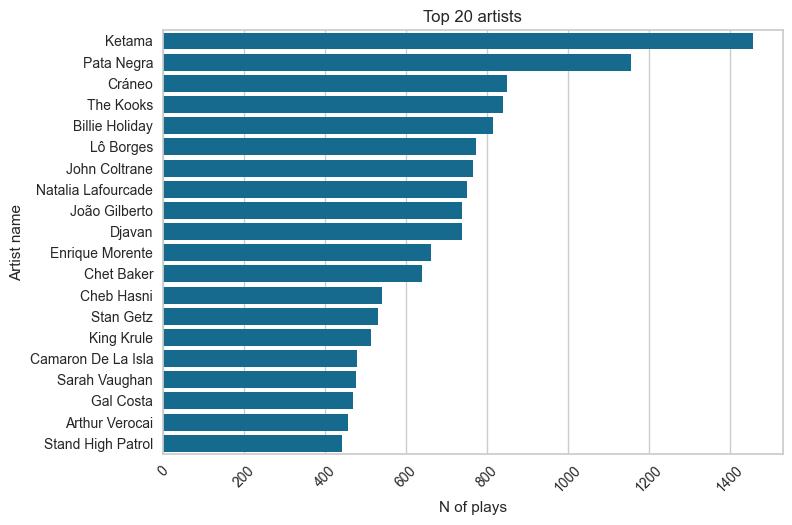

In [44]:
# Create top artists
artists_top20 = history["master_metadata_album_artist_name"].value_counts().head(21).index.tolist()
artists_top20.remove("None")

# Plot top 20 artists
figure = sns.countplot(
    data = history.query(
        "master_metadata_album_artist_name in @artists_top20"
        )["master_metadata_album_artist_name"], 
    order=artists_top20
)

# Set plot title and labels
plt.title("Top 20 artists")
plt.ylabel("Artist name")
plt.xlabel("N of plays")
plt.xticks(rotation=45)

# Save fig
plt.savefig('./top_artists.png')

# Show the plot
plt.show()

>*Do I consistently listen to the same songs and albums, or do I explore their entire discographies?*


In [45]:
# Let's add the number of unique albums as the radius of the scatter plot
history_artists = history[["spotify_track_uri", "first_artist_id", "name_artist"]].groupby(["first_artist_id","name_artist"]).count().reset_index().sort_values(by="spotify_track_uri", ascending=False).head(100)
history_artists_unique = history[["spotify_track_uri", "first_artist_id", "name_artist"]].drop_duplicates(subset="spotify_track_uri").groupby(["first_artist_id","name_artist"]).count().reset_index().sort_values(by="spotify_track_uri", ascending=False)
history_artists_unique.rename(columns={"spotify_track_uri" : "unique_songs"}, inplace = True)
history_artists = pd.merge(history_artists, history_artists_unique, on = ["first_artist_id","name_artist"], how="left")
history_artists.rename(columns={"spotify_track_uri" : "total_songs"}, inplace = True)
history_albums = history[["spotify_track_uri", "album.id", "first_artist_id"]].drop_duplicates(subset="album.id").groupby(["first_artist_id"]).count().reset_index().sort_values(by="spotify_track_uri", ascending=False)
history_albums.rename(columns={"spotify_track_uri" : "unique_albums"}, inplace = True)
history_artists = pd.merge(history_artists, history_albums, on = ["first_artist_id"], how="left")

# Let's plot the scatter plot between total songs and unique songs with plotly express
fig = px.scatter(history_artists.iloc[:20,:], x="total_songs", y="unique_songs",
                  color="name_artist", size = "unique_albums", labels={"name_artist":"Artist", "unique_songs":"Nº of unique songs", "total_songs":"Nº of songs listened", "unique_albums":"Nº of unique albums"})
fig.show()

In [46]:
fig.write_html("./output/top_artists_albums.html", full_html=False, include_plotlyjs='cdn')

### Genres

In [47]:
history_exploded_genres = history.explode("genres")

In [48]:
history_exploded_genres.columns

Index(['ts', 'platform', 'ms_played', 'conn_country', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode', 'duration', 'hours', 'minutes', 'seconds',
       'ip_addr_anonymized', 'username_annonymized', 'track_uri_clean',
       'artists', 'available_markets', 'disc_number', 'duration_ms',
       'explicit', 'href', 'id', 'is_local', 'name', 'popularity',
       'preview_url', 'track_number', 'type', 'uri', 'album.album_type',
       'album.artists', 'album.available_markets',
       'album.external_urls.spotify', 'album.href', 'album.id', 'album.images',
       'album.name', 'album.release_date', 'album.release_date_precision',
       'album.total_tracks', 'album.type', 'album.uri', 'external_ids.i

In [49]:
genres_year = history_exploded_genres[["spotify_track_uri", "genres", "ts_year",]].groupby(["ts_year", "genres"]).count().reset_index()
genres_year

,ts_year,genres,spotify_track_uri
0,2010,acid rock,2
1,2010,acoustic pop,30
2,2010,adult standards,11
3,2010,alaska indie,1
4,2010,album rock,39
...,...,...,...
7521,2024,wave,1
7522,2024,welsh rock,1
7523,2024,wonky,66
7524,2024,world fusion,8


In [50]:
genres_year_ms_played =  history_exploded_genres[["minutes", "genres", "ts_year",]].groupby(["ts_year", "genres"]).sum().reset_index()
genres_year_ms_played

,ts_year,genres,minutes
0,2010,acid rock,1.524667
1,2010,acoustic pop,27.689500
2,2010,adult standards,1.378633
3,2010,alaska indie,0.611967
4,2010,album rock,58.491817
...,...,...,...
7521,2024,wave,0.113200
7522,2024,welsh rock,0.029183
7523,2024,wonky,145.569867
7524,2024,world fusion,3.988350


In [51]:
genres_year = pd.merge(genres_year, genres_year_ms_played, on = ["ts_year", "genres"])
genres_year

,ts_year,genres,spotify_track_uri,minutes
0,2010,acid rock,2,1.524667
1,2010,acoustic pop,30,27.689500
2,2010,adult standards,11,1.378633
3,2010,alaska indie,1,0.611967
4,2010,album rock,39,58.491817
...,...,...,...,...
7521,2024,wave,1,0.113200
7522,2024,welsh rock,1,0.029183
7523,2024,wonky,66,145.569867
7524,2024,world fusion,8,3.988350


In [52]:
top_genres=[]

In [53]:
for year in range(2010, 2025, 1):
    top_genres+= genres_year.query('ts_year == @year').sort_values(by="spotify_track_uri",ascending=False).genres.unique()[0:10].tolist()

In [54]:
top_genres

['modern rock',
 'rock',
 'garage rock',
 'chamber pop',
 'indie rock',
 'brighton indie',
 'alternative rock',
 'melancholia',
 'pop',
 'permanent wave',
 'modern rock',
 'rock',
 'indie rock',
 'garage rock',
 'alternative rock',
 'indietronica',
 'permanent wave',
 'chamber pop',
 'melancholia',
 'alternative dance',
 'modern rock',
 'rock',
 'indietronica',
 'indie rock',
 'alternative rock',
 'permanent wave',
 'chamber pop',
 'melancholia',
 'garage rock',
 'indie folk',
 'modern rock',
 'indie rock',
 'rock',
 'indietronica',
 'chamber pop',
 'alternative rock',
 'shimmer pop',
 'permanent wave',
 'classic rock',
 'noise pop',
 'soul',
 'indietronica',
 'alternative rock',
 'jazz',
 'electronica',
 'vocal jazz',
 'indie rock',
 'bebop',
 'noise pop',
 'rock',
 'indietronica',
 'jazz',
 'alternative rock',
 'bebop',
 'vocal jazz',
 'soul',
 'rock',
 'wonky',
 'intelligent dance music',
 'permanent wave',
 'jazz',
 'soul',
 'vocal jazz',
 'bebop',
 'hard bop',
 'jazz saxophone',
 

Let's simplify a little bit:

In [55]:
for i in set(top_genres):
    print(f'"{i}" : "",')

"spanish pop" : "",
"melancholia" : "",
"pop flamenco" : "",
"jazz funk" : "",
"mpb" : "",
"latin alternative" : "",
"wonky" : "",
"chamber pop" : "",
"indie folk" : "",
"classic rock" : "",
"bebop" : "",
"jazz" : "",
"rock andaluz" : "",
"musica tradicional cubana" : "",
"spanish electronic" : "",
"samba" : "",
"soul jazz" : "",
"flamenco" : "",
"permanent wave" : "",
"classic arab pop" : "",
"belly dance" : "",
"ethio-jazz" : "",
"electronica" : "",
"modern rock" : "",
"bossa nova" : "",
"indie rock" : "",
"soul" : "",
"alternative rock" : "",
"brazilian jazz" : "",
"noise pop" : "",
"world" : "",
"brighton indie" : "",
"rap latina" : "",
"cantautor" : "",
"alternative dance" : "",
"rock" : "",
"classic soul" : "",
"jazz trumpet" : "",
"cante flamenco" : "",
"cool jazz" : "",
"vocal jazz" : "",
"rumba" : "",
"arab groove" : "",
"contemporary post-bop" : "",
"spanish pop rock" : "",
"nuevo flamenco" : "",
"intelligent dance music" : "",
"indietronica" : "",
"garage rock" : "",
"violao

Copy the output above and map the principal genres. I made an example with my data

In [56]:
map_genres = {"indietronica" : "indie",
"soul" : "jazz",
"noise pop" : "pop",
"wonky" : "electronic",
"classic arab pop" : "rai",
"mpb" : "mpb",
"jazz funk" : "jazz",
"rai" : "rai",
"modern rock" : "indie",
"cante flamenco" : "flamenco",
"world" : "world",
"belly dance" : "world",
"jazz" : "jazz",
"garage rock" : "indie",
"cantautor" : "pop",
"brighton indie" : "indie",
"rap latina" : "rap",
"tropicalia" : "mpb",
"jazz trumpet" : "jazz",
"vocal jazz" : "jazz",
"latin alternative" : "indie",
"rock andaluz" : "flamenco",
"spanish pop rock" : "flamenco",
"ethio-jazz" : "ethio-jazz",
"spanish pop" : "pop",
"chamber pop" : "pop",
"intelligent dance music" : "electronic",
"rock" : "rock",
"free jazz" : "jazz",
"musica tradicional cubana" : "world",
"pop flamenco" : "flamenco",
"electronica" : "electronic",
"brazilian jazz" : "jazz",
"spanish electronic" : "electronic",
"rumba" : "flamenco",
"contemporary post-bop" : "jazz",
"indie folk" : "indie",
"cool jazz" : "jazz",
"alternative dance" : "indie",
"jazz saxophone" : "jazz",
"classic rock" : "rock",
"contemporary jazz" : "jazz",
"permanent wave" : "electronic",
"shimmer pop" : "pop",
"bossa nova" : "mpb",
"pop" : "pop",
"nuevo flamenco" : "flamenco",
"samba" : "mpb",
"bebop" : "jazz",
"alternative rock" : "indie",
"arab groove" : "rai",
"violao" : "mpb",
"flamenco" : "flamenco",
"indie rock" : "indie",
"hard bop" : "jazz",
"flamenco electronica" : "flamenco",
"soul jazz" : "jazz",
"melancholia" : "pop",
}

In [57]:
genres_year_top = genres_year.loc[genres_year.genres.isin(top_genres)].copy()

In [58]:
genres_year_top["genres"] = genres_year_top.genres.map(map_genres)

In [59]:
genres_year_top = genres_year_top.groupby(["ts_year", "genres"]).sum().reset_index()

In [60]:
from itertools import product
genres_year_top_figure_df = pd.DataFrame(list(product(genres_year_top.genres.unique().tolist(), range(2010, 2025, 1))), columns=['genres', 'ts_year'])
genres_year_top_figure_df[["ms","plays"]] = 0

In [61]:
genres_year_top_figure_df = pd.merge(genres_year_top_figure_df, genres_year_top, on = ["genres", "ts_year"], how="left")
genres_year_top_figure_df.head()

,genres,ts_year,ms,plays,spotify_track_uri,minutes
0,electronic,2010,0,0,294.0,404.730233
1,electronic,2011,0,0,554.0,537.001950
2,electronic,2012,0,0,585.0,1105.975483
3,electronic,2013,0,0,323.0,477.472400
4,electronic,2014,0,0,849.0,1216.991517


In [62]:
genres_year_top_figure_df.spotify_track_uri.isna().value_counts()

spotify_track_uri
False    140
True      25
Name: count, dtype: int64

In [63]:
genres_year_top_figure_df["final_plays"] = genres_year_top_figure_df.apply(lambda x: x["spotify_track_uri"] if pd.notna(x["spotify_track_uri"]) else 0, axis = 1 )
genres_year_top_figure_df["final_duration"] = genres_year_top_figure_df.apply(lambda x: x["minutes"] if pd.notna(x["minutes"]) else 0, axis = 1 )

In [64]:
genres_year_top_figure_df.loc[genres_year_top_figure_df.spotify_track_uri.isna()]

,genres,ts_year,ms,plays,spotify_track_uri,minutes,final_plays,final_duration
20,flamenco,2015,0,0,NaN,NaN,0.0,0.0
90,mpb,2010,0,0,NaN,NaN,0.0,0.0
105,world,2010,0,0,NaN,NaN,0.0,0.0
107,world,2012,0,0,NaN,NaN,0.0,0.0
120,ethio-jazz,2010,0,0,NaN,NaN,0.0,0.0
121,ethio-jazz,2011,0,0,NaN,NaN,0.0,0.0
122,ethio-jazz,2012,0,0,NaN,NaN,0.0,0.0
123,ethio-jazz,2013,0,0,NaN,NaN,0.0,0.0
134,ethio-jazz,2024,0,0,NaN,NaN,0.0,0.0
135,rai,2010,0,0,NaN,NaN,0.0,0.0


In [65]:
genres_year_top_figure_df = genres_year_top_figure_df.rename(columns={"ts_year" : "year", "genres" : "genre", "final_plays" : "total_plays"})
genres_year_top_figure_df

,genre,year,ms,plays,spotify_track_uri,minutes,total_plays,final_duration
0,electronic,2010,0,0,294.0,404.730233,294.0,404.730233
1,electronic,2011,0,0,554.0,537.001950,554.0,537.001950
2,electronic,2012,0,0,585.0,1105.975483,585.0,1105.975483
3,electronic,2013,0,0,323.0,477.472400,323.0,477.472400
4,electronic,2014,0,0,849.0,1216.991517,849.0,1216.991517
...,...,...,...,...,...,...,...,...
160,rap,2020,0,0,294.0,584.240500,294.0,584.240500
161,rap,2021,0,0,113.0,199.858817,113.0,199.858817
162,rap,2022,0,0,88.0,143.442367,88.0,143.442367
163,rap,2023,0,0,47.0,123.077850,47.0,123.077850


In [66]:
total_plays = genres_year_top_figure_df[["genre", "year", "total_plays"]].groupby('year')['total_plays'].sum()
total_plays

year
2010     6542.0
2011     6724.0
2012     6369.0
2013     5262.0
2014     6624.0
2015     4570.0
2016     1955.0
2017     9648.0
2018    10276.0
2019    22591.0
2020     8187.0
2021     8325.0
2022    16989.0
2023    11608.0
2024     4028.0
Name: total_plays, dtype: float64

In [67]:
# Calculate percentage of total plays for each item
genres_year_top_figure_df['percentage'] =  genres_year_top_figure_df.apply(lambda x: (x['total_plays'] / total_plays[x['year']]) * 100, axis=1)
genres_year_top_figure_df

,genre,year,ms,plays,spotify_track_uri,minutes,total_plays,final_duration,percentage
0,electronic,2010,0,0,294.0,404.730233,294.0,404.730233,4.494039
1,electronic,2011,0,0,554.0,537.001950,554.0,537.001950,8.239143
2,electronic,2012,0,0,585.0,1105.975483,585.0,1105.975483,9.185115
3,electronic,2013,0,0,323.0,477.472400,323.0,477.472400,6.138350
4,electronic,2014,0,0,849.0,1216.991517,849.0,1216.991517,12.817029
...,...,...,...,...,...,...,...,...,...
160,rap,2020,0,0,294.0,584.240500,294.0,584.240500,3.591059
161,rap,2021,0,0,113.0,199.858817,113.0,199.858817,1.357357
162,rap,2022,0,0,88.0,143.442367,88.0,143.442367,0.517982
163,rap,2023,0,0,47.0,123.077850,47.0,123.077850,0.404893


In [68]:
fig = px.line(genres_year_top_figure_df.loc[genres_year_top_figure_df.year<2024], x="year", y="percentage", color='genre', markers= True,
              labels={"percentage" : "% of total genres", "year":"Year", "genre":"Genre"})
fig.show()

In [69]:
fig.write_html("./output/genres_over_years.html", full_html=False, include_plotlyjs='cdn')

Now let's create a graph of the connections between genres

In [70]:
history_full_genres = history[["spotify_track_uri", "genres", "first_artist_id"]].dropna().drop_duplicates(subset="first_artist_id")
history_full_genres["len_genres"] = history_full_genres.genres.apply(lambda x: len(x))
history_full_genres = history_full_genres.loc[history_full_genres.len_genres>1].reset_index()
history_full_genres["list2"] = history_full_genres.genres.apply(lambda x: x[1:])
history_full_genres

,index,spotify_track_uri,genres,first_artist_id,len_genres,list2
0,0,spotify:track:2iuIqCjjPKg3DYwHHAo0kJ,"[garage rock, modern rock, permanent wave, roc...",7Ln80lUS6He07XvHI8qqHH,5,"[modern rock, permanent wave, rock, sheffield ..."
1,5,spotify:track:7kzKAuUzOITUauHAhoMoxA,"[alternative rock, garage rock, modern rock, p...",0epOFNiUfyON9EYx7Tpr6V,5,"[garage rock, modern rock, permanent wave, rock]"
2,6,spotify:track:7BHPGtpuuWWsvE7cCaMuEU,"[brighton indie, garage rock, modern rock, rock]",1GLtl8uqKmnyCWxHmw9tL4,4,"[garage rock, modern rock, rock]"
3,28,spotify:track:0dcJ1SsbTmAvC3ZVvUYMIy,"[alternative rock, garage rock, garage rock re...",4DToQR3aKrHQSSRzSz8Nzt,8,"[garage rock, garage rock revival, modern rock..."
4,32,spotify:track:305WCRhhS10XUcH6AEwZk6,"[garage rock, modern rock, pop rock]",5ypxebeHEIXjMtJb17uJlI,3,"[modern rock, pop rock]"
...,...,...,...,...,...,...
3009,87229,spotify:track:7aUVgoxAuMwu4docNzSf1F,"[fourth world, j-ambient, spanish experimental]",5gdvIKIFREcJmy3LV6yhBh,3,"[j-ambient, spanish experimental]"
3010,87262,spotify:track:22E6kA3vDifcIsJbLnYhQO,"[eurodance, hip house]",6J4vIWJhZpQ0s1DC9Dn2qn,2,[hip house]
3011,87815,spotify:track:566FjMKFgXYXzDSiJlgJjg,"[cante flamenco, flamenco, flamenco guitar]",4ysF82P1vuRBFkt8qEAVa6,3,"[flamenco, flamenco guitar]"
3012,87955,spotify:track:5IM1TAhZ0tGhPketsWMC02,"[footwork, future garage, glitch, glitch hop, ...",06xa1OLBsMQJFXcl2tQkH4,8,"[future garage, glitch, glitch hop, halftime d..."


In [71]:
history_full_genres = history_full_genres.explode("list2").explode("genres")
history_full_genres["check"] = history_full_genres["genres"] == history_full_genres["list2"]
history_full_genres = history_full_genres.loc[history_full_genres.check==False]
history_full_genres = history_full_genres[["genres", "list2", "check"]].groupby(["genres", "list2"]).count().reset_index().sort_values("check", ascending=False)
history_full_genres

,genres,list2,check
1849,bebop,jazz,68
2924,cante flamenco,flamenco,60
3749,contemporary post-bop,jazz,55
3440,classic rock,rock,54
12420,reggae,roots reggae,50
...,...,...,...
6056,free improvisation,tzadik,1
6057,free improvisation,zolo,1
6060,free jazz,british jazz,1
6063,free jazz,electric bass,1


In [72]:
# Set n of genres to represent
n_genres = 2000
history_full_genres_backup = history_full_genres.copy()
history_full_genres = history_full_genres.head(n_genres)

In [73]:
sources = history_full_genres['genres']
targets = history_full_genres['list2']
edge_data = zip(sources.tolist(), targets.tolist())

In [74]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.physics import Physics
from pyvis.network import Network

got_net = nx.Graph()

got_net.add_edges_from(edge_data)

scale=1 # Scaling the size of the nodes by 10*degree
d = dict(got_net.degree)

#Updating dict
d.update((x, scale*y) for x, y in d.items())

#Setting up size attribute
nx.set_node_attributes(got_net,d,'size')

G2 = Network(height="750px", width="100%",bgcolor="#222222",font_color="white", notebook=True)
G2.from_nx(got_net)


In [75]:
# Save the plot
G2.show("./genres_network_map.html")

./genres_network_map.html


### Features

Now let's retrieve the features from the spotify API

In [76]:
audio_features = []
n = 50
for i in range(0,len(history.spotify_track_uri.unique().tolist()), n):
    tracks = history.spotify_track_uri.unique().tolist()[i:i+n-1]
    audio_features+=sp.audio_features(tracks)
features = pd.json_normalize(audio_features)
features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.350,0.877,11.0,-4.707,0.0,0.1270,0.03330,0.000000,0.0825,0.417,169.694,audio_features,2iuIqCjjPKg3DYwHHAo0kJ,spotify:track:2iuIqCjjPKg3DYwHHAo0kJ,https://api.spotify.com/v1/tracks/2iuIqCjjPKg3...,https://api.spotify.com/v1/audio-analysis/2iuI...,212667.0,4.0
1,0.654,0.828,1.0,-5.377,0.0,0.0281,0.00146,0.000144,0.1220,0.790,112.056,audio_features,0kvKVeUmmNbhPShLhKpfCV,spotify:track:0kvKVeUmmNbhPShLhKpfCV,https://api.spotify.com/v1/tracks/0kvKVeUmmNbh...,https://api.spotify.com/v1/audio-analysis/0kvK...,183893.0,4.0
2,0.454,0.778,9.0,-4.225,1.0,0.0449,0.00998,0.000000,0.0427,0.704,127.158,audio_features,5vefQfYc9Oxn8VHfgUCi1q,spotify:track:5vefQfYc9Oxn8VHfgUCi1q,https://api.spotify.com/v1/tracks/5vefQfYc9Oxn...,https://api.spotify.com/v1/audio-analysis/5vef...,177947.0,4.0
3,0.522,0.889,1.0,-4.137,1.0,0.0461,0.00328,0.000000,0.3450,0.852,144.499,audio_features,6Iz0GanKO6r5JSL7FX7ChL,spotify:track:6Iz0GanKO6r5JSL7FX7ChL,https://api.spotify.com/v1/tracks/6Iz0GanKO6r5...,https://api.spotify.com/v1/audio-analysis/6Iz0...,141133.0,4.0
4,0.580,0.972,11.0,-4.274,0.0,0.0589,0.00384,0.000000,0.2960,0.926,105.492,audio_features,3pBnRFCyLUm3ErAfZMagQi,spotify:track:3pBnRFCyLUm3ErAfZMagQi,https://api.spotify.com/v1/tracks/3pBnRFCyLUm3...,https://api.spotify.com/v1/audio-analysis/3pBn...,130813.0,4.0


In [77]:
history = pd.merge(history, features, left_on = "spotify_track_uri", right_on="uri", how = "left")
history.columns

Index(['ts', 'platform', 'ms_played', 'conn_country', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode', 'duration', 'hours', 'minutes', 'seconds',
       'ip_addr_anonymized', 'username_annonymized', 'track_uri_clean',
       'artists', 'available_markets', 'disc_number', 'duration_ms_x',
       'explicit', 'href', 'id_x', 'is_local', 'name', 'popularity',
       'preview_url', 'track_number', 'type_x', 'uri_x', 'album.album_type',
       'album.artists', 'album.available_markets',
       'album.external_urls.spotify', 'album.href', 'album.id', 'album.images',
       'album.name', 'album.release_date', 'album.release_date_precision',
       'album.total_tracks', 'album.type', 'album.uri', 'extern

In [78]:
columns_selection = ['year_month', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms_y']

history_selection_mean = history[columns_selection].groupby("year_month").mean().reset_index()

In [79]:
history_selection_mean_time = history_selection_mean.melt(id_vars = ["year_month"], value_vars = columns_selection[1:], var_name = "feature", value_name = "value")

In [80]:
history_selection_mean_time

,year_month,feature,value
0,10-06,danceability,0.551372
1,10-07,danceability,0.518905
2,10-08,danceability,0.542618
3,10-09,danceability,0.557307
4,10-10,danceability,0.523157
...,...,...,...
1915,24-01,duration_ms_y,238509.975709
1916,24-02,duration_ms_y,243146.510324
1917,24-03,duration_ms_y,238766.142226
1918,24-04,duration_ms_y,242973.917706


In [81]:
history_selection_mean["year_month"] = pd.to_datetime(history_selection_mean.year_month, format="%y-%m")

Plot the energy and tempo over the years

In [82]:
fig = px.scatter(history_selection_mean, x = "year_month", y = "tempo", color = "energy", trendline="lowess", trendline_options=dict(frac=0.2), labels = {"year_month" : "Period", "tempo": "Tempo", "energy":"Energy"}, title="Tempo and Energy over time"  )

# Add events that can explain differences, for ex:
fig.add_vline(x=datetime.strptime("2020-06-21", "%Y-%m-%d").timestamp() * 1000, annotation_text="Event 1",line_width=3, line_dash="dash", line_color="green")
fig.add_vline(x=datetime.strptime("2015-09-01", "%Y-%m-%d").timestamp() * 1000, annotation_text="Event 2",line_width=3, line_dash="dash", line_color="green")

fig.show()

In [83]:
fig.write_html("./output/scatter_tempo_energy.html", full_html=False, include_plotlyjs='cdn')


Are any of the features affected by the seasons?

In [84]:
history_selection_chart_features = history_selection_mean_time.loc[history_selection_mean_time["feature"].isin(['danceability', 'energy', 'key',
       'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence'])]
history_selection_chart_features["year_month"]=pd.to_datetime(history_selection_chart_features.year_month, format="%y-%m")

/var/folders/yh/x279jgtx5kl6hvdfz8dcbkvr0000gn/T/ipykernel_16274/1264156395.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
#You can try with different features
feauture_selected = "danceability"
fig = px.scatter(history_selection_chart_features.loc[history_selection_chart_features.feature==feauture_selected], trendline="rolling", x="year_month", y="value", trendline_options=dict(window=5),
                labels = {"year_month" : "Period", "value":"Danceability"}, title="Danceability over the seasons")
for i in range(2010, 2024):
    fig.add_vrect(x0=datetime.strptime(f"{i}-03-21", "%Y-%m-%d").timestamp() * 1000, x1=datetime.strptime(f"{i}-09-21", "%Y-%m-%d").timestamp() * 1000, fillcolor="orange", opacity=0.2, line_width=0)
    fig.add_vrect(x0=datetime.strptime(f"{i}-09-21", "%Y-%m-%d").timestamp() * 1000, x1=datetime.strptime(f"{i+1}-03-21", "%Y-%m-%d").timestamp() * 1000, fillcolor="green", opacity=0.15, line_width=0)

fig.add_vrect(x0=datetime.strptime(f"2010-03-21", "%Y-%m-%d").timestamp() * 1000, x1=datetime.strptime(f"2010-09-21", "%Y-%m-%d").timestamp() * 1000, fillcolor="orange", opacity=0, line_width=0)
fig.add_annotation(x=datetime.strptime(f"2010-03-21", "%Y-%m-%d").timestamp() * 1000, y=0.6,
            text="Warm",
            showarrow=False,
            xanchor="left",
            yanchor="top",
            textangle=90)
fig.add_annotation(x=datetime.strptime(f"2010-10-21", "%Y-%m-%d").timestamp() * 1000, y=0.6,
            text="Cold",
            showarrow=False,
            xanchor="left",
            yanchor="top",
            textangle=90)
            
fig.add_vrect(x0=datetime.strptime(f"2010-09-21", "%Y-%m-%d").timestamp() * 1000, x1=datetime.strptime(f"2011-03-21", "%Y-%m-%d").timestamp() * 1000, fillcolor="orange", opacity=0, line_width=0)

fig.data = [t for t in fig.data if t.mode == "lines"]
fig.update_traces(showlegend=True) 
fig.update_layout(showlegend=False)

fig.show()

In [86]:
fig.write_html("./output/feature_seasons.html", full_html=False, include_plotlyjs='cdn')

### Clustering analysis
Let's apply a k-means clustering algorithm to cluster the songs by the features

In [87]:
columns_cluster = ["track_uri_clean", 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']
clustering = history[columns_cluster].drop_duplicates(subset="track_uri_clean").set_index("track_uri_clean")
clustering.dropna(inplace=True)
clustering


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
track_uri_clean,,,,,,,,,,,
2iuIqCjjPKg3DYwHHAo0kJ,0.350,0.8770,11.0,-4.707,0.0,0.1270,0.03330,0.000000,0.0825,0.4170,169.694
0kvKVeUmmNbhPShLhKpfCV,0.654,0.8280,1.0,-5.377,0.0,0.0281,0.00146,0.000144,0.1220,0.7900,112.056
5vefQfYc9Oxn8VHfgUCi1q,0.454,0.7780,9.0,-4.225,1.0,0.0449,0.00998,0.000000,0.0427,0.7040,127.158
6Iz0GanKO6r5JSL7FX7ChL,0.522,0.8890,1.0,-4.137,1.0,0.0461,0.00328,0.000000,0.3450,0.8520,144.499
3pBnRFCyLUm3ErAfZMagQi,0.580,0.9720,11.0,-4.274,0.0,0.0589,0.00384,0.000000,0.2960,0.9260,105.492
...,...,...,...,...,...,...,...,...,...,...,...
3kCuvDN2z4Yh1OexpyX0wv,0.714,0.9950,1.0,-5.019,1.0,0.0478,0.00111,0.822000,0.0960,0.9720,165.003
31TmMwrJRrLodH5hMIdleC,0.612,0.9000,1.0,-10.026,1.0,0.0593,0.80000,0.870000,0.1900,0.3010,129.734
5IM1TAhZ0tGhPketsWMC02,0.661,0.7880,11.0,-7.828,0.0,0.1410,0.00436,0.728000,0.2420,0.2940,169.935


To search the optimal number of clusters, we use the "Elbow Method". First we normalize the data

In [88]:
d_xlim = {
    'danceability': [0,1], 
    'energy': [0,1], 
    'loudness': [-20,0], 
    'speechiness': [0,1], 
    'acousticness': [0,1], 
    'liveness': [0,1], 
    'valence': [0,1], 
    'tempo': [0,200]}

def normalize(df):
    print(df.shape)
    for feature in d_xlim.keys():
        df = df[(df[feature]<=d_xlim[feature][1]) & (df[feature]>=d_xlim[feature][0]) ]
    print(df.shape)
    for feature in d_xlim.keys():
        df[feature] = df[feature] / np.absolute(d_xlim[feature][1]  - d_xlim[feature][0])
    return df
    
df_norm_us = clustering.copy()
df_norm_us = normalize(df_norm_us)

df_norm = df_norm_us.copy()

remove_cols = ['track_uri_clean', 'mode', 'key', 'instrumentalness','time_signature']
use_cols = [col for col in df_norm.columns if col not in remove_cols]

X = df_norm[use_cols].drop_duplicates().to_numpy()
X_fit = df_norm[use_cols].to_numpy()

(27749, 11)
(26150, 11)


Now we create the silohuette graph

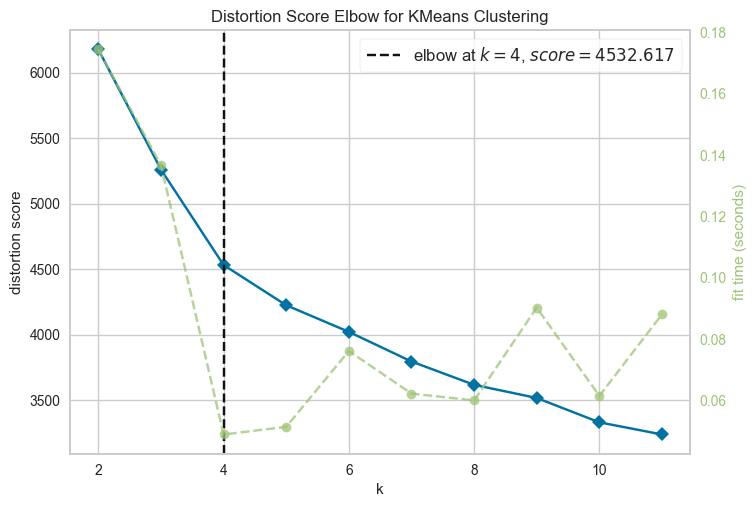

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [89]:
X = np.array(clustering)

scaler = MinMaxScaler()
scaler.fit(X_fit)
X_scaler=scaler.transform(X_fit)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(X_scaler)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [90]:
# You should change the optimal number of clusters from your figure
n_clusters=4


In [91]:
# k-means clustering
kmeans = KMeans(n_clusters = n_clusters,      
                init = 'k-means++', 
                n_init= 10,         
                max_iter=350,       
                tol=1e-04,          
                random_state = 42   
               ) 
pred_y = kmeans.fit_predict(X_fit)

df_norm['class_pred'] = pred_y
df_norm['class_pred'].value_counts()

class_pred
1    7401
2    6502
3    6169
0    6078
Name: count, dtype: int64

In [92]:
# visualize the average of features of the four classes
use_cols = use_cols + ['class_pred']
df_norm['loudness'] = - df_norm['loudness']
polar=df_norm[use_cols].groupby(["class_pred"]).mean().reset_index()
polar=pd.melt(polar,id_vars=["class_pred"])
fig = px.line_polar(polar, r="value", theta="variable", color="class_pred", line_close=True)
fig.show()

df_norm['loudness'] = - df_norm['loudness']

In [93]:
fig.write_html("./output/clusters_features.html", full_html=False, include_plotlyjs='cdn')